<a href="https://colab.research.google.com/github/Yash-Jumde/Colab-Notebooks/blob/main/NN_Classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Binary Classification
# Multiclass classification --> multiple samples having individual labels.
# Multilabel classification --> one sample having multiple labels.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from sklearn.datasets import make_circles

n = 1000
X, y = make_circles(n, noise=0.03, random_state=10)

In [ ]:
X

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       ...,
       [ 0.82190708, -0.05501004],
       [ 0.02210515,  0.95250698],
       [-1.04922246, -0.1882639 ]])

In [ ]:
y[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,-0.310314,-0.683169,1
1,0.654843,-0.408102,1
2,0.720671,0.421821,1
3,-0.544078,0.811637,0
4,-0.812086,-0.143518,1
...,...,...,...
995,-0.613536,-0.706016,0
996,0.750838,0.249544,1
997,0.821907,-0.055010,1
998,0.022105,0.952507,0


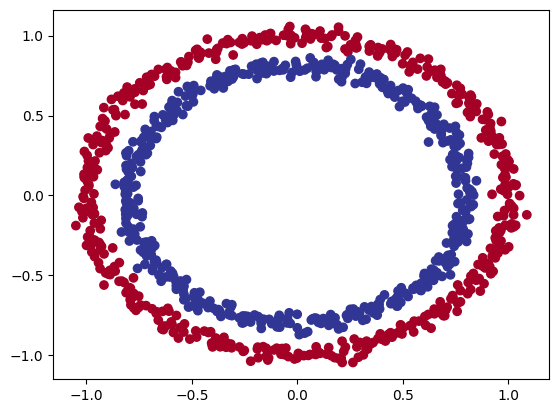

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([-0.31031434, -0.68316883]), 1)

In [ ]:
# Create, Compile, fit, evalute

tf.random.set_seed(10)

# Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.9684 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 6.1476 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


In [ ]:
# 49% accuracy means it's basically just guessing the output. Thus, we need to improve it
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 7ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619483947754, 0.5]

In [ ]:
# Let's try a model with extra layers
tf.random.set_seed(10)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.9140 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6953 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4980
Epoch 11/

In [ ]:
model_2.evaluate(X, y)
# Similar losses and accuracy as previous models.

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5120


[0.6933979988098145, 0.5120000243186951]

In [ ]:
# Make a better model
tf.random.set_seed(10)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5030


[0.6945292949676514, 0.503000020980835]

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by a model prediciting on x.
  """

  # Create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create the X values to predict on.
  x_input = np.c_[xx.ravel(), yy.ravel()]
  # Stacks 2-D arrays together.

  # Now, make predictions
  y_pred = model.predict(x_input)

  # For multi-class classification systems.
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # Reshape the array
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1492224581010344,
 1.1867851022338038,
 -1.1446000474478029,
 1.1572159250597795)

313/313 [==============================] - 1s 1ms/step
doing binary classification


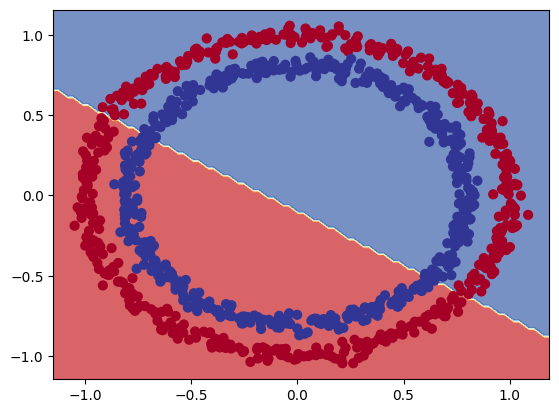

In [ ]:
# Let's check our model_3
plot_decision_boundary(model=model_3, X=X, y=y)

In [ ]:
# Our model is treating this as a regression problem

In [ ]:
# Let's try and add some non-linearity

tf.random.set_seed(10)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.1287 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9195 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7227 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6355 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5838 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5672 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5392 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5325 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5261 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5207 - accuracy: 0.4690
Epoch 11/

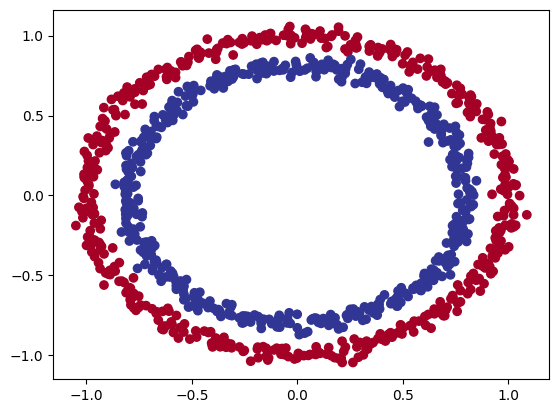

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


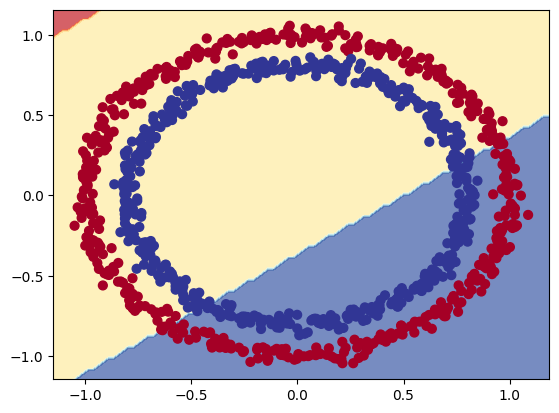

In [ ]:
# Checking the decision bounadry.

plot_decision_boundary(model_4, X, y)

In [ ]:
# Still getting regression results.

In [ ]:
tf.random.set_seed(10)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5559 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5077 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4931 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4487 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4059 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3788 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3460 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2189 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1858 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1658 - accuracy: 0.4750
Epoch 11/

In [ ]:
# Not a better result

In [ ]:
tf.random.set_seed(10)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs= 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 2.7155 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.4990
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7688 - accuracy: 0.4330
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7636 - accuracy: 0.3660
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.3070
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.3350
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7533 - accuracy: 0.2820
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.3780
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classification


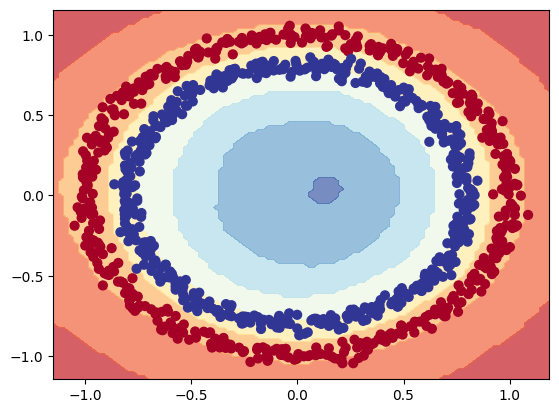

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Another model with less parameters.

tf.random.set_seed(10)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.4346 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1031 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9366 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8488 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.4730
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7864 - accuracy: 0.4260
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7749 - accuracy: 0.3720
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.3710
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7595 - accuracy: 0.3760
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7539 - accuracy: 0.3770
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


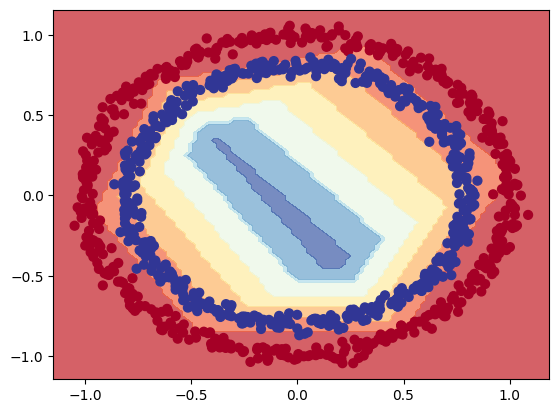

In [ ]:
plot_decision_boundary(model_7, X, y)

In [ ]:
# Let's try softmax for output layer

tf.random.set_seed(10)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5160
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5330
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5500
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5930
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6060
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5940
Epoch 11/

In [ ]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9980


[0.1399848908185959, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classification


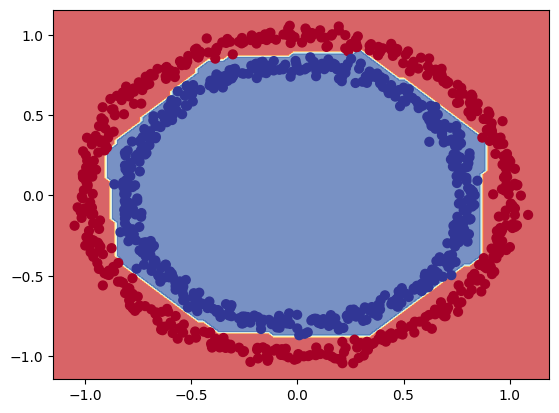

In [ ]:
plot_decision_boundary(model_8, X, y)

In [ ]:
# Let's split data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's create a model for the split data and evalute it

tf.random.set_seed(10)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5038
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5337
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5375
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5437
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5813
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.5437
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6850
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.5763
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6888
Epoch 11/

In [ ]:
# Evaluate

model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9750


[0.05097534507513046, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


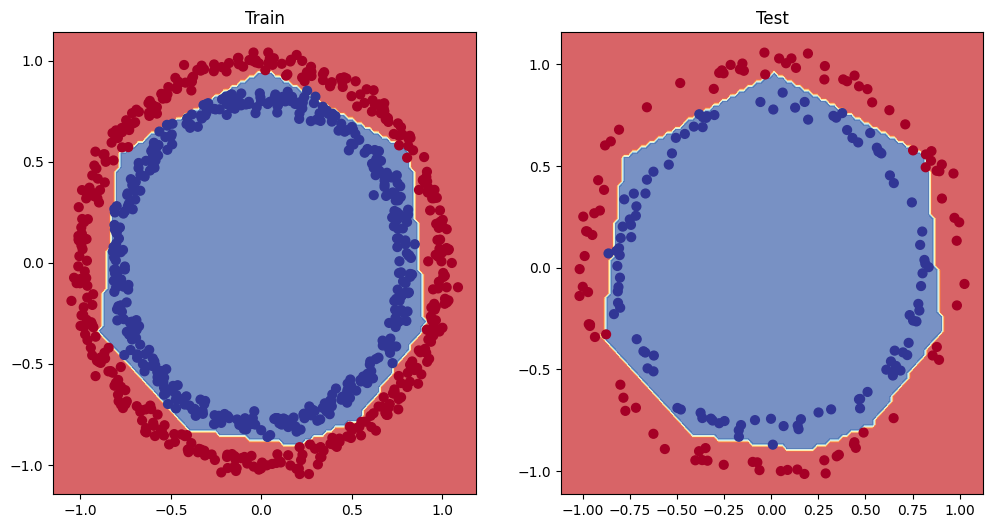

In [ ]:
# plots

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_9, X_test, y_test)

plt.show()

In [ ]:
# Let's try and plot our history variable
# It's always recommended to visalize the data, the model, trainig(losses, etc.) and the predictions

In [ ]:
history.history

{'loss': [0.6913160681724548,
  0.6862489581108093,
  0.6825087070465088,
  0.6784414649009705,
  0.6733624935150146,
  0.6659976840019226,
  0.6580328941345215,
  0.6478358507156372,
  0.6357166171073914,
  0.6207811236381531,
  0.590080201625824,
  0.5558313727378845,
  0.5190346837043762,
  0.49228420853614807,
  0.47613850235939026,
  0.4564553201198578,
  0.4357302784919739,
  0.41884368658065796,
  0.4071624279022217,
  0.401765376329422,
  0.39226800203323364,
  0.3860477805137634,
  0.37865814566612244,
  0.3724253475666046,
  0.3632853329181671,
  0.3613177239894867,
  0.3543282747268677,
  0.3494744896888733,
  0.33910176157951355,
  0.3362954258918762,
  0.3254837393760681,
  0.33285677433013916,
  0.317766398191452,
  0.3134598433971405,
  0.30201250314712524,
  0.29374995827674866,
  0.2829139828681946,
  0.2783227562904358,
  0.26931628584861755,
  0.19056688249111176,
  0.13085700571537018,
  0.11791868507862091,
  0.10616461932659149,
  0.09577300399541855,
  0.09309261

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691316,0.50375
1,0.686249,0.51500
2,0.682509,0.53375
3,0.678441,0.53750
4,0.673362,0.54375
...,...,...
95,0.031482,0.99375
96,0.032920,0.98750
97,0.035994,0.98875
98,0.037030,0.98750


Text(0.5, 1.0, 'Model 9 loss curves')

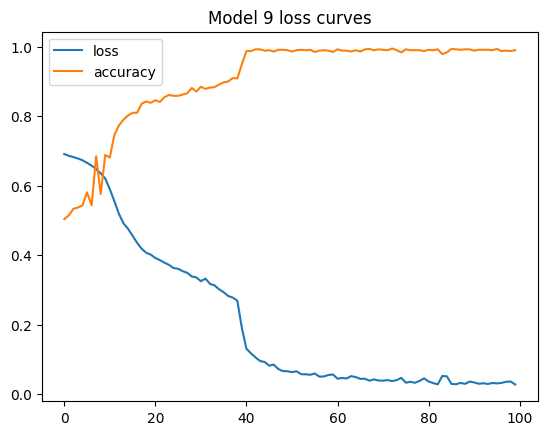

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model 9 loss curves')

In [ ]:
# loss goes down and accuracy goes up as we can see in this plot.

In [ ]:
# Finding best learning rate.
# 1. Learning rate callback
# 2. Model
# 3. Plot

In [ ]:
tf.random.set_seed(10)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 **(epoch/20))

history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6992 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5075 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

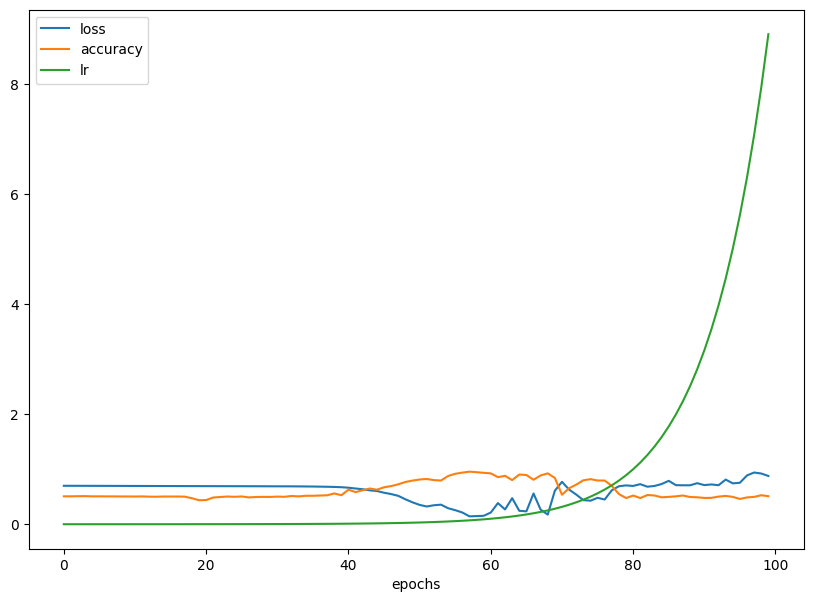

In [ ]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel='epochs')

In [ ]:
# plot learning rate vs loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate v/s Loss')

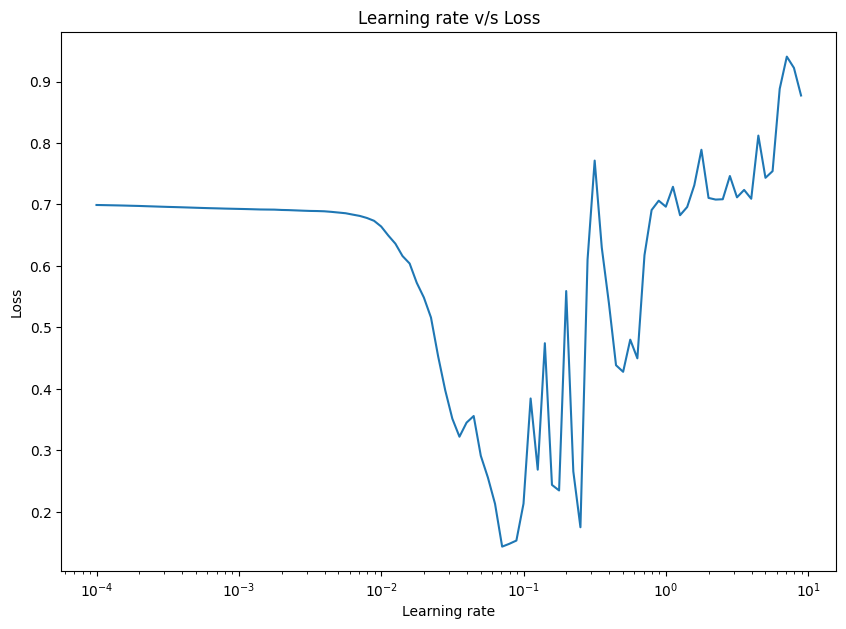

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate v/s Loss')

In [ ]:
# This is how you can find the best learning rate.
# The learning rate to be used is between 10 times lower than the lowest point on the graph.

In [ ]:
# Classification evaluation methods
# 1. Accuracy --> tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score()
# Default metric for classification. But, not the best for imbalanced classes.
# 2. Precision --> tf.keras.metrics.Precision() or sklearn.metrics.precision_score()
# Higher precision leads to less false positives.
# 3. Recall --> tf.keras.metrics.Recall() or sklearn.metrics.recall_score()
# Higher recall leads to less false negatives.
# 4. F1-score = 2 * (precision * recall) / (precision + recall)
# sklearn.metrics.f1_score() --> combination of precision  and recall,
# Usually a god overall metric for a classification model.
# 5. Confusion Matrix --> custom function or sklearn.metrics.confusion_matrix()
# When comparing predictions to truth labels to see where the model gets confused.
# Can be hard to use with large numbers of classes.
# 6. Classification report
# Collection of some of the main classification metrics such as precision,
# recall and f1-score.
# sklearn.metrics.classification_report()

In [ ]:
# Above methods in practise.

In [ ]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9750
Model loss on the test set: 0.05097534507513046
Model accuracy on the test set: 97.50%


In [ ]:
# Confusion matrix.

# True Label     Positive           Negative
# True Label     Negative           Positive
#             Predicted Label   Predicted Label

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_9.predict(X_test)
# convert the preds to binary
y_preds = tf.round(y_preds)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


array([[ 91,   3],
       [  2, 104]])

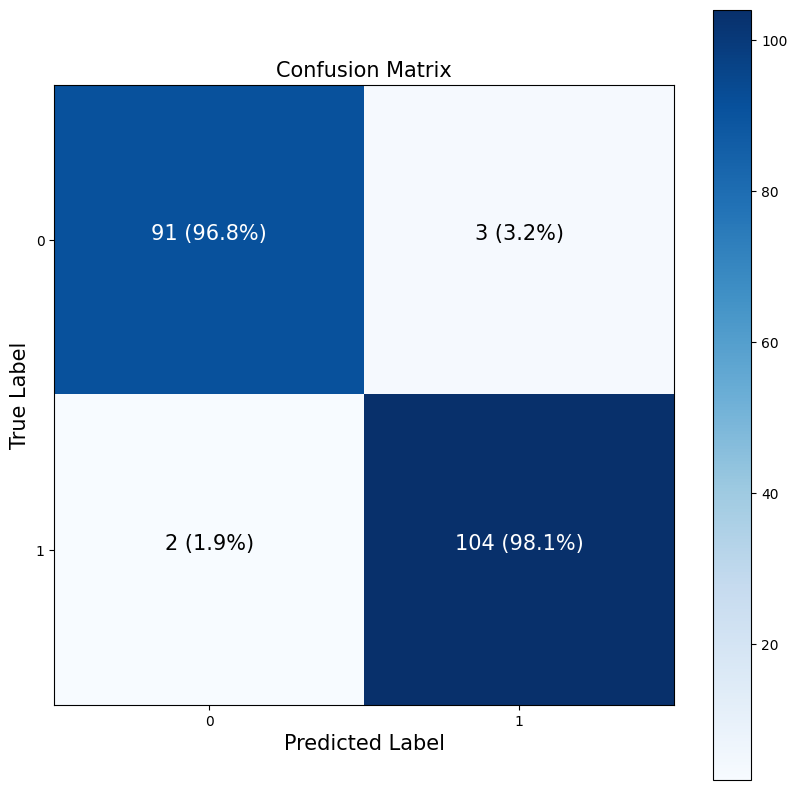

In [ ]:
# Let's pretiffy this confusion matrix, using plot_confusion_matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10),
                          text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  # This is done to normalize our confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # classes = False
  # For multi-class classification.

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100 :.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size = text_size)

make_confusion_matrix(y_test, y_preds)

In [ ]:
# Itertools combines two things into each combination

In [ ]:
# --------*******  MULTICLASS CLASSIFICATION  *******--------

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# data is already split into training and test sets.
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [ ]:
# no. 9 is an ankle boot

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

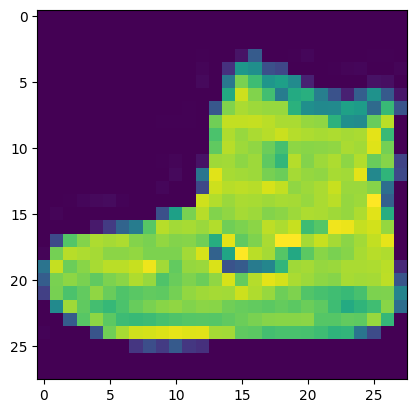

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

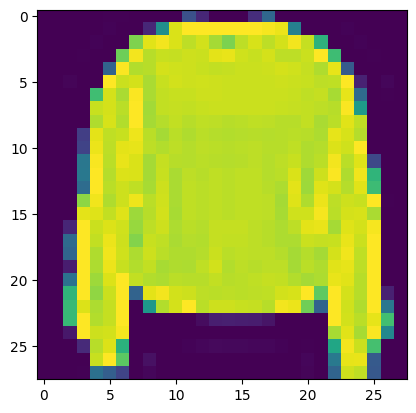

In [ ]:
plt.imshow(train_data[7])

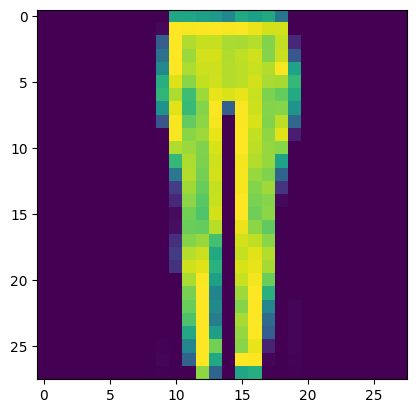

In [ ]:
plt.imshow(train_data[102])

In [ ]:
# Let's put human readble names on this

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

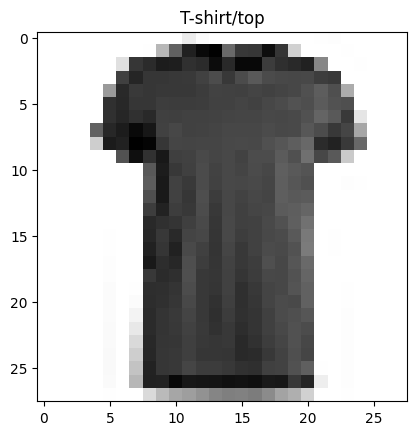

In [ ]:
# Let's see a binary image and it's label

plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

Text(0.5, 1.0, 'Dress')

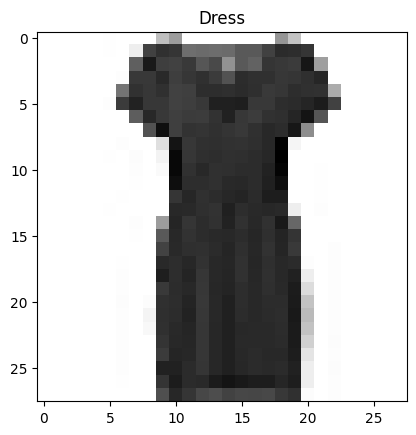

In [ ]:
plt.imshow(train_data[20], cmap=plt.cm.binary)
plt.title(class_names[train_labels[20]])

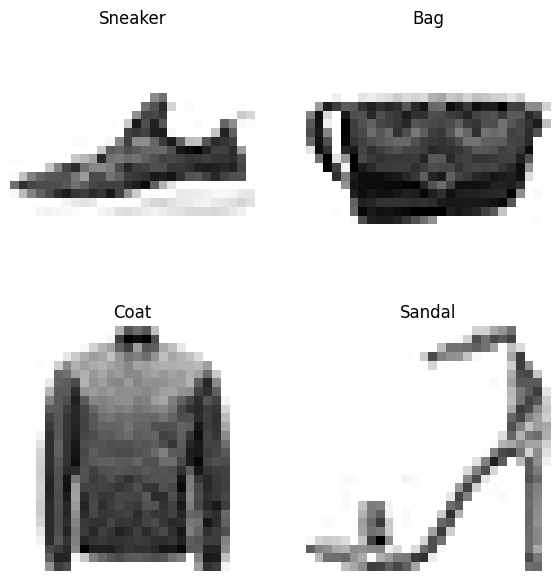

In [ ]:
# Let's plot multiple random images of fashion MINST to see the data closely.
import random
plt.figure(figsize=(7, 7))

for i in range(4):
  # ax is used as we want to plot multiple different plots.
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

In [ ]:
# Building a multiclass classification model.

In [ ]:
# softmax and categoricalcrossentropy are used here

# For our model,
# The input shape = 28, 28
# The output shape = 10 (1 per class)
# loss = tf.keras.CategoricalCrossentropy()

In [ ]:
tf.random.set_seed(10)

# Our data needs to be flattened
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# if we are using the class labels in a one hot encoding, we can use
# "CategoricalCrossentropy()",
# so we need to use: tf.one_hot(train_labels, depth=10), here depth is equal
# to the number of classes.
# If we want to use integers, we have to use "SparseCategoricalCrossentropy"

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

not_normalized_history = model_11.fit(train_data, train_labels, epochs=10,
                                       validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.8788 - accuracy: 0.0997 - val_loss: 2.3046 - val_accuracy: 0.0999
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let's normalize the train data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
norm_train_data = train_data/255.0
norm_test_data = test_data/255.0

norm_train_data.min(), norm_train_data.max()

(0.0, 1.0)

In [ ]:
# let's try the eaxct same model with the normalized data.

tf.random.set_seed(10)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

normalized_history = model_12.fit(norm_train_data, train_labels, epochs = 10,
                                  validation_data=(norm_test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0469 - accuracy: 0.6345 - val_loss: 0.7023 - val_accuracy: 0.7474
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6468 - accuracy: 0.7613 - val_loss: 0.6351 - val_accuracy: 0.7663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5940 - accuracy: 0.7789 - val_loss: 0.6038 - val_accuracy: 0.7790
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5711 - accuracy: 0.7882 - val_loss: 0.5836 - val_accuracy: 0.7884
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5581 - accuracy: 0.7942 - val_loss: 0.5815 - val_accuracy: 0.7920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5489 - accuracy: 0.7989 - val_loss: 0.5694 - val_accuracy: 0.7964
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5424 - accuracy: 0.8022 - val_loss: 0.5724 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

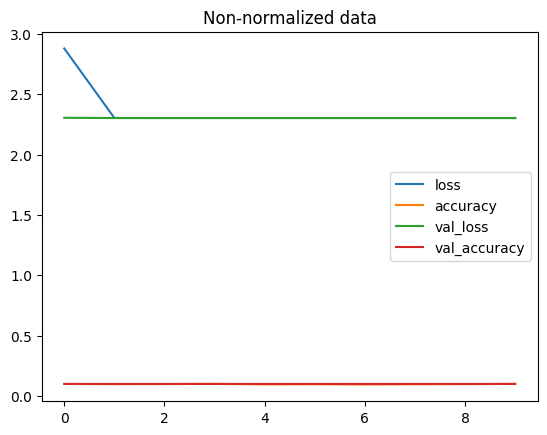

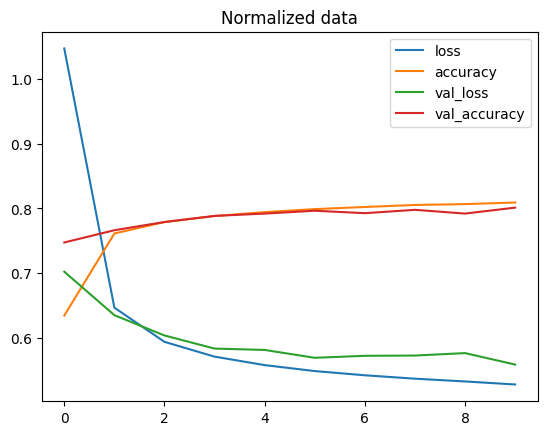

In [ ]:
import pandas as pd

pd.DataFrame(not_normalized_history.history).plot(title='Non-normalized data')

pd.DataFrame(normalized_history.history).plot(title='Normalized data')

In [ ]:
# Let's try to find ideal learning rate
tf.random.set_seed(10)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 **(epoch/20))

find_lr_hist = model_13.fit(norm_train_data, train_labels,
                            epochs=40,
                            validation_data=(norm_test_data, test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1084 - accuracy: 0.1880 - val_loss: 1.9637 - val_accuracy: 0.2782 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7895 - accuracy: 0.3403 - val_loss: 1.6641 - val_accuracy: 0.3989 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4546 - accuracy: 0.5066 - val_loss: 1.2958 - val_accuracy: 0.5401 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1749 - accuracy: 0.5860 - val_loss: 1.1046 - val_accuracy: 0.6236 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0256 - accuracy: 0.6298 - val_loss: 0.9801 - val_accuracy: 0.6362 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9259 - accuracy: 0.6468 - val_loss: 0.9019 - val_accuracy: 0.6535 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Finding the ideal learning rate')

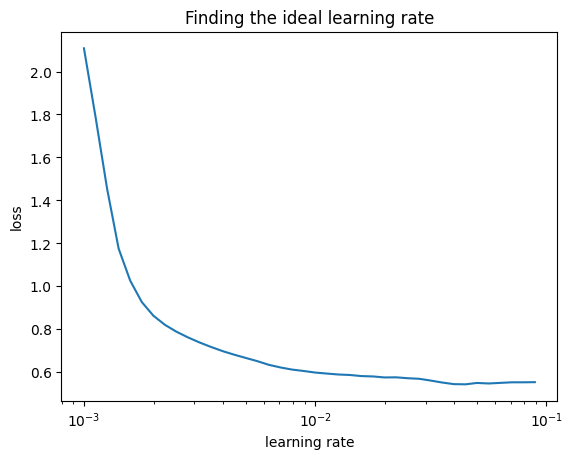

In [ ]:
# plot learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_hist.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')

In [ ]:
# refitting the model with this ideal learning rate

tf.random.set_seed(10)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

hist_14 = model_14.fit(norm_train_data, train_labels,
                       epochs=20,
                       validation_data = (norm_test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.0473 - accuracy: 0.6245 - val_loss: 0.7643 - val_accuracy: 0.7319
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6785 - accuracy: 0.7520 - val_loss: 0.6698 - val_accuracy: 0.7521
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6138 - accuracy: 0.7718 - val_loss: 0.6198 - val_accuracy: 0.7791
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5831 - accuracy: 0.7879 - val_loss: 0.6047 - val_accuracy: 0.7879
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5620 - accuracy: 0.8004 - val_loss: 0.5863 - val_accuracy: 0.7955
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5474 - accuracy: 0.8075 - val_loss: 0.5753 - val_accuracy: 0.8022
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5353 - accuracy: 0.8125 - val_loss: 0.5652 - val_accuracy:

In [ ]:
# Evaluation metrics.

# 1. Confusion matrix.
y_prob = model_14.predict(norm_test_data)

y_prob

313/313 [==============================] - 2s 5ms/step


array([[1.8198334e-07, 4.6747355e-06, 4.8323495e-06, ..., 4.6475690e-02,
        2.8039870e-04, 8.3109152e-01],
       [1.3811828e-04, 6.5320869e-06, 8.3668226e-01, ..., 2.8813884e-31,
        1.8552570e-03, 5.8930010e-22],
       [2.4688603e-07, 9.9932426e-01, 5.8946520e-04, ..., 1.3632122e-12,
        4.9697343e-07, 1.7331204e-05],
       ...,
       [1.4764245e-01, 1.2266701e-06, 3.6195230e-02, ..., 2.4428090e-12,
        5.4232788e-01, 2.3319341e-10],
       [1.4096018e-05, 9.9635166e-01, 2.8253151e-03, ..., 1.1187605e-09,
        7.1097429e-06, 1.2517613e-04],
       [1.3511689e-05, 3.1134209e-07, 3.6200076e-05, ..., 7.1961838e-03,
        1.1900304e-02, 9.4161779e-03]], dtype=float32)

In [ ]:
y_prob[0]

array([1.8198334e-07, 4.6747355e-06, 4.8323495e-06, 5.9631300e-09,
       2.7760992e-08, 1.2214261e-01, 4.3359405e-09, 4.6475690e-02,
       2.8039870e-04, 8.3109152e-01], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# Convert all the prediction probabilites to integers.

y_preds = y_prob.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[796,   4,  21,  79,   1,   4,  88,   0,   7,   0],
       [  1, 954,  10,  32,   3,   0,   0,   0,   0,   0],
       [ 24,   8, 707,  16, 165,   0,  73,   0,   7,   0],
       [ 34,  21,  15, 858,  25,   2,  42,   0,   3,   0],
       [  2,   3, 121,  44, 737,   0,  85,   0,   8,   0],
       [  0,   1,   0,   0,   0, 910,   0,  46,   6,  37],
       [195,   5, 147,  64, 155,   0, 424,   0,  10,   0],
       [  0,   0,   0,   0,   0,  40,   0, 898,   0,  62],
       [  9,   1,  28,  13,   1,  28,  11,   3, 904,   2],
       [  0,   0,   0,   0,   0,  25,   0,  35,   2, 938]])

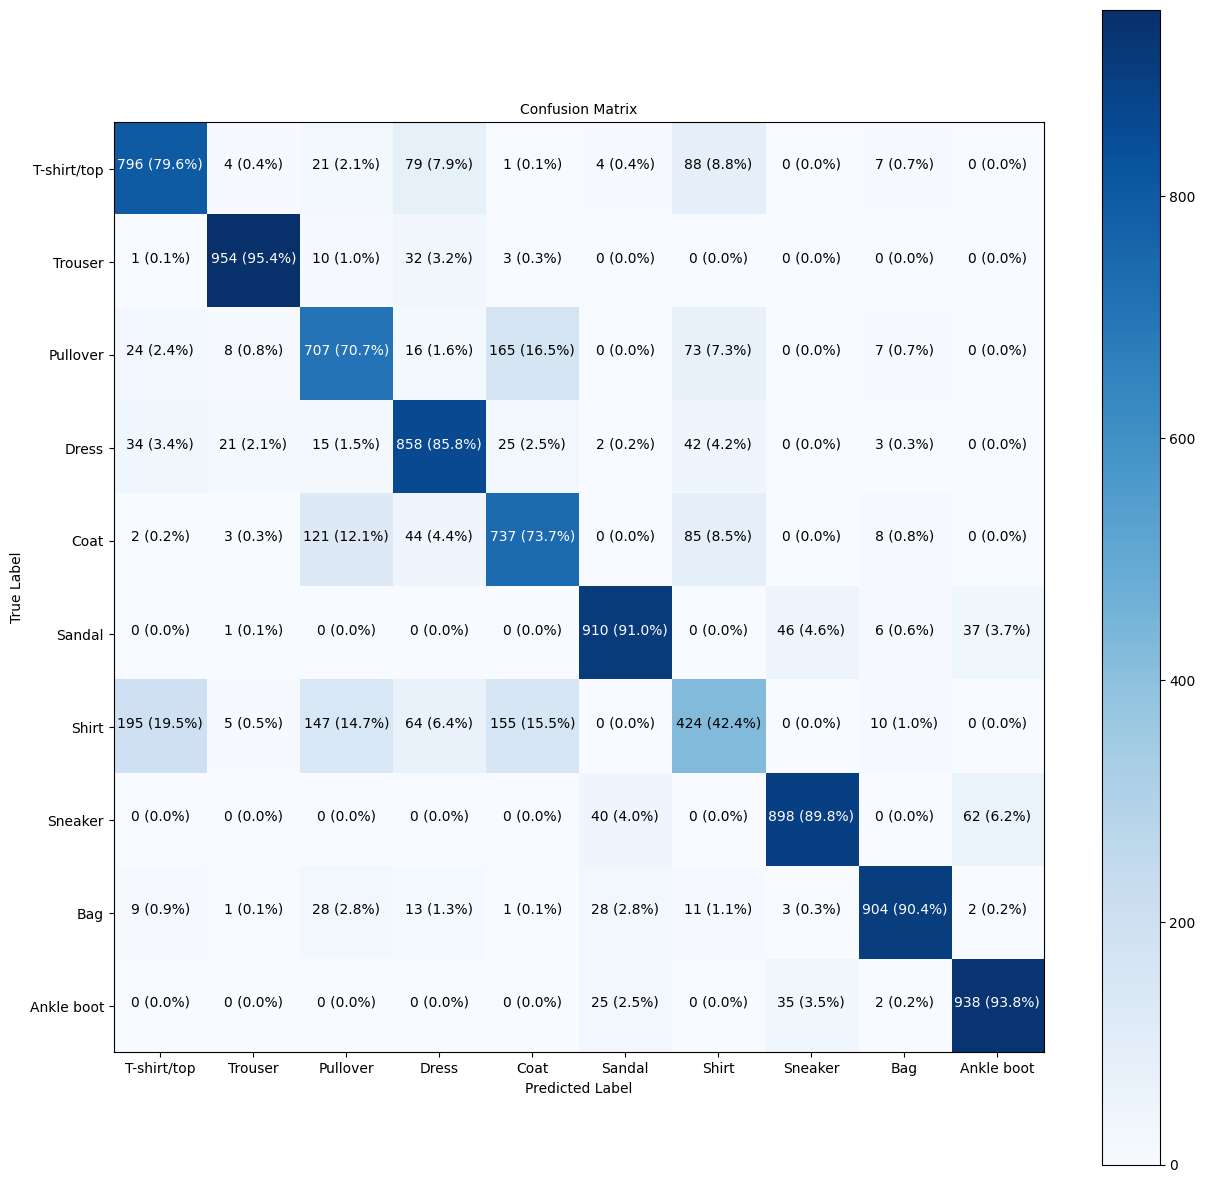

In [ ]:
make_confusion_matrix(test_labels, y_preds, classes=class_names,
                      figsize=(15,15), text_size = 10)

In [ ]:
# Assessing the predictions with some visualizations

# plot a random image,
# make a prediction on that image
# Label the plot with truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  # trying to change the color of the title based on if it's right or wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_prob),
                                                   true_label),
             color = color)

1/1 [==============================] - 0s 37ms/step


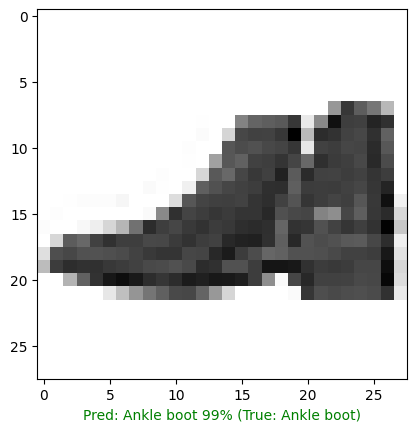

In [ ]:
plot_random_image(model_14, norm_test_data, test_labels, class_names)

In [ ]:
# What patterns is the model learning?

model_14.layers

In [ ]:
# Extract a layer
model_14.layers[1]

In [ ]:
# get patterns of a layer
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.3384028 ,  0.49709067, -0.37442735, -0.3138965 ],
        [-0.71419317,  0.57895446, -0.16382053, -0.05466729],
        [-0.9227038 ,  0.19906086, -0.81678104,  0.83189774],
        ...,
        [ 0.46758342, -0.06360697,  0.02675024,  0.2073961 ],
        [ 0.4202036 , -0.09893184,  0.2792451 , -0.33786073],
        [-0.0922394 ,  0.2176993 , -0.07110897, -0.17216486]],
       dtype=float32),
 (784, 4))

In [ ]:
# Tensorflow initializes random weights for a model using,
# kernel_initializer = 'glorot_uniform'

In [ ]:
biases, biases.shape

(array([0.92284805, 0.45304725, 1.2213813 , 1.4111425 ], dtype=float32), (4,))

In [ ]:
# bias_initializer = 'zeros' --> at least for a dense layer.

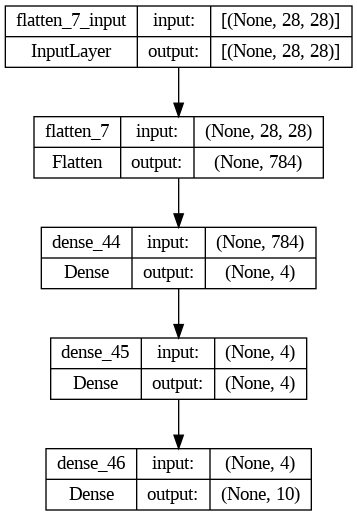

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)